# Étude de la convergence

Considérons le problème de Cauchy

trouver la fonction $y \colon I\subset \mathbb{R} \to \mathbb{R}$ définie sur l'intervalle $I=[0,1]$ telle que
$$
\begin{cases}
y'(t) = y(t), &\forall t \in I=[0,1],\\
y(0) = 1
\end{cases}
$$
dont la solution est $y(t)=e^{t}$. 

1. On se propose d'estimer l'ordre de convergence de la méthode d'Euler explicite. 
	On calcule d'abord la solution approchée avec différentes valeurs de $h_k=1/N_k$, à savoir $1/2$, $1/4$, $1/8$, \dots, $1/1024$ (ce qui correspond à différentes valeurs de $N_k$, à savoir $2$, $2^2$, $2^3$, ... $2^{10}$). 
	Pour chaque valeur de $h_k$, on calcule le maximum de la valeur absolue de l'erreur et on sauvegarde toutes ces erreurs dans le vecteur `err_ep` de sort que `err_ep[k]` contient $e_k=\max_{i=0,\dots,N_k}|y(t_i)-u_{i}|$ avec $N_k=2^{k+1}$. 
	Pour estimer l'ordre de convergence on applique alors la formule
	$$
	p_k=\frac{\ln\left| \frac{e_k}{e_{k-1}} \right|}{\ln\left| \frac{h_k}{h_{k-1}} \right|},
	\qquad k=1,\dots,10.
	$$
	On trouve ainsi la pente de la droite qui relie l'erreur au pas $k$ à l'erreur au pas $k+1$. 
    Pour estimer la pente globale on pourra utiliser la fonction `polyfit` basée sur la régression linéaire. 	
2. Même exercice pour estimer l'ordre de convergence des méthodes d'Euler modifié, de Heun, AB$_2$, AB$_3$, AB$_4$, AB$_5$, N$_2$, N$_3$, N$_4$, RK$_4$.
3. Même exercice pour les méthodes predictor-corrector AM$_4$-AB$_1$, AM$_4$-AB$_2$, AM$_4$-AB$_3$.
4. Puisque la fonction $\varphi(t,y)=y$, toute méthode implicite peut être rendu explicite par un calcul élémentaire. On peut alors estimer de la même manière l'ordre de convergence des méthodes d'Euler implicite, de Crank-Nicolson, AM$_1$, AM$_2$, AM$_3$, AM$_4$, BDF$_2$, BDF$_3$ en explicitant directement pour chaque schéma l'expression de $u_{n+1}$. Cependant, nous pouvons utiliser le le module `SciPy` sans modifier l'implémentation des schémas.


Attention: les schémas multistep ont besoin d'initialiser plusieurs pas de la suite définie pas récurrence pour pouvoir démarrer. 
Dans cette étude, au lieu d'utiliser un schéma d'ordre inférieur pour initialiser la suite, on utilisera la solution exacte (en effet, l'utilisation d'un schéma d'ordre inférieur dégrade l'ordre de précision).

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Schémas-explicites" data-toc-modified-id="Schémas-explicites-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Schémas explicites</a></span></li><li><span><a href="#Schémas-implicites" data-toc-modified-id="Schémas-implicites-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Schémas implicites</a></span></li><li><span><a href="#Schémas-predicteur-correcteur" data-toc-modified-id="Schémas-predicteur-correcteur-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Schémas predicteur-correcteur</a></span></li><li><span><a href="#Calculs" data-toc-modified-id="Calculs-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Calculs</a></span></li></ul></div>

On commence par importer les modules `math` et `matplotlib` :

In [1]:
import math
from matplotlib.pylab import *
%matplotlib inline

Pour résoudre les équations implicites présentes dans les schémas implicites, on peut par exemple importer la fonction `fsolve` du module `scipy.optimize` :

In [2]:
from scipy.optimize import fsolve

On initialise le problème de Cauchy

In [3]:
t0, y0, tfinal = 0., 1., 3.

On définit la solution exacte:

In [4]:
def sol_exacte(t):
	return math.exp(t)
	#return math.exp(-t)
	#return math.sqrt(2.*t+1.)
	#return math.sqrt(t**2+1.)
	#return 1./math.sqrt(1.-2.*t)

On définit l'équation différentielle : `phi` est une fonction python qui contient la fonction mathématique $\varphi(t, y)=2ty$ dépendant des variables $t$ et $y$.

In [5]:
def phi(t,y):
	return y
	#return -y
	#return 1./y 
	#return t/y 
	#return y**3 

On écrit les schémas numériques :
les nœuds d'intégration $[t_0,t_1,\dots,t_{N}]$ sont contenus dans le vecteur `tt` (qui change en fonction de `h`) et les valeurs $[u_0,u_1,\dots,u_{N}]$ pour chaque méthode sont contenues dans le vecteur `uu`.

## Schémas explicites

**Schéma d'Euler progressif :**
$$
\begin{cases}
u_0=y_0,\\
u_{n+1}=u_n+h\varphi(t_n,u_n)& n=0,1,2,\dots  N-1
\end{cases}
$$

In [6]:
def euler_progressif(phi,tt):
    uu = [y0]
    for i in range(N):
        uu.append(uu[i]+h*phi(tt[i],uu[i]))
    return uu

**Schéma de Adam-Bashforth d'ordre 2:**
$$
\begin{cases}
u_0=y_0,\\
u_{1}=u_0+h\varphi(t_0,u_0),\\
u_{n+1}=u_n+\frac{h}{2}\Bigl(3\varphi(t_n,u_n)-\varphi(t_{n-1},u_{n-1})\Bigr)& n=1,2,3,4,5,\dots  N-1
\end{cases}
$$

In [7]:
def AB2(phi,tt):
    uu = [y0]
    uu.append(sol_exacte(tt[1]))
    for i in range(1,N):
        k1 = h * phi( tt[i], uu[i] )
        k2 = h * phi( tt[i-1], uu[i-1] )
        uu.append( uu[i] + (3.*k1-k2) /2.0 )
    return uu

**Schéma de Adam-Bashforth d'ordre 3:**
$$
\begin{cases}
u_0=y_0,\\
u_{1}=u_0+h\varphi(t_0,u_0),\\
u_{2}=u_1+\frac{h}{2}\Bigl(3\varphi(t_1,u_1)-\varphi(t_{0},u_{0})\Bigr),\\
u_{n+1}=u_n+\frac{h}{12}\Bigl(23\varphi(t_n,u_n)-16\varphi(t_{n-1},u_{n-1})+5\varphi(t_{n-2},u_{n-2})\Bigr)& n=2,3,4,5,\dots  N-1
\end{cases}
$$

In [8]:
def AB3(phi,tt):
    uu = [y0]
    uu.append(sol_exacte(tt[1]))
    uu.append(sol_exacte(tt[2]))
    for i in range(2,N):
        k1 = h * phi( tt[i], uu[i] )
        k2 = h * phi( tt[i-1], uu[i-1] )
        k3 = h * phi( tt[i-2], uu[i-2] )
        uu.append( uu[i] + (23.*k1-16.*k2+5.*k3) /12.0 )
    return uu

**Schéma de Adam-Bashforth d'ordre 4:**
$$
\begin{cases}
u_0=y_0,\\
u_{1}=u_0+h\varphi(t_0,u_0),\\
u_{2}=u_1+\frac{h}{2}\Bigl(3\varphi(t_1,u_1)-\varphi(t_{0},u_{0})\Bigr),\\
u_{3}=u_2+\frac{h}{12}\Bigl(23\varphi(t_2,u_2)-16\varphi(t_{1},u_{1})+5\varphi(t_{0},u_{0})\Bigr),\\
u_{n+1}=u_n+\frac{h}{24}\Bigl(55\varphi(t_n,u_n)-59\varphi(t_{n-1},u_{n-1})+37\varphi(t_{n-2},u_{n-2})-9\varphi(t_{n-3},u_{n-3})\Bigr)& n=3,4,5,\dots  N-1
\end{cases}
$$

In [9]:
def AB4(phi,tt):
    uu = [y0]
    uu.append(sol_exacte(tt[1]))
    uu.append(sol_exacte(tt[2]))
    uu.append(sol_exacte(tt[3]))
    for i in range(3,N):
        k1 = h * phi( tt[i], uu[i] )
        k2 = h * phi( tt[i-1], uu[i-1] )
        k3 = h * phi( tt[i-2], uu[i-2] )
        k4 = h * phi( tt[i-3], uu[i-3] )
        uu.append( uu[i] + (55.*k1-59.*k2+37.*k3-9.*k4) /24.0 )
    return uu

**Schéma de Adam-Bashforth d'ordre 5:**
$$
\begin{cases}
u_0=y_0,\\
u_{1}=u_0+h\varphi(t_0,u_0),\\
u_{2}=u_1+\frac{h}{2}\Bigl(3\varphi(t_1,u_1)-\varphi(t_{0},u_{0})\Bigr),\\
u_{3}=u_2+\frac{h}{12}\Bigl(23\varphi(t_2,u_2)-16\varphi(t_{1},u_{1})+5\varphi(t_{0},u_{0})\Bigr),\\
u_{4}=u_3+\frac{h}{24}\Bigl(55\varphi(t_3,u_3)-59\varphi(t_{2},u_{2})+37\varphi(t_{1},u_{1})-9\varphi(t_{0},u_{0})\Bigr),\\
u_{n+1}=u_n+\frac{h}{720}\Bigl(1901\varphi(t_n,u_n)-2774\varphi(t_{n-1},u_{n-1})+2616\varphi(t_{n-2},u_{n-2})-1274\varphi(t_{n-3},u_{n-3})+251\varphi(t_{n-4},u_{n-4})\Bigr)& n=4,5,\dots  N-1
\end{cases}
$$

In [10]:
def AB5(phi,tt):
    uu = [y0]
    uu.append(sol_exacte(tt[1]))
    uu.append(sol_exacte(tt[2]))
    uu.append(sol_exacte(tt[3]))
    uu.append(sol_exacte(tt[4]))
    for i in range(4,N):
        k1 = h * phi( tt[i], uu[i] )
        k2 = h * phi( tt[i-1], uu[i-1] )
        k3 = h * phi( tt[i-2], uu[i-2] )
        k4 = h * phi( tt[i-3], uu[i-3] )
        k5 = h * phi( tt[i-4], uu[i-4] )
        uu.append( uu[i] + (1901.*k1-2774.*k2+2616.*k3-1274.*k4+251*k5) /720.0 )
    return uu

**Schéma de Nylström d'ordre 2:**
$$
\begin{cases}
u_0=y_0,\\
u_{1}=u_0+h\varphi(t_0,u_0),\\
u_{n+1}=u_{n-1}+2h\varphi(t_{n},u_{n})& n=1,2,3,4,5,\dots  N-1
\end{cases}
$$

In [11]:
def N2(phi,tt):
    uu = [y0]
    uu.append(sol_exacte(tt[1]))
    for i in range(1,N):
        k1 = h * phi( tt[i], uu[i] )
        uu.append( uu[i-1] + 2.0*k1 )
    return uu

**Schéma de Nylström d'ordre 3:**
$$
\begin{cases}
u_0=y_0,\\
u_{1}=u_0+h\varphi(t_0,u_0),\\
u_{2}=u_{0}+2h\varphi(t_{1},u_{1}),\\
u_{n+1}=u_{n-1}+\frac{h}{3}\Bigl(7\varphi(t_{n},u_{n})-2\varphi(t_{n-1},u_{n-1})+\varphi(t_{n-2},u_{n-2})\Bigr)& n=2,3,4,5,\dots  N-1
\end{cases}
$$

In [12]:
def N3(phi,tt):
    uu = [y0]
    uu.append(sol_exacte(tt[1]))
    uu.append(sol_exacte(tt[2]))
    for i in range(2,N):
        k1 = h * phi( tt[i], uu[i] )
        k2 = h * phi( tt[i-1], uu[i-1] )
        k3 = h * phi( tt[i-2], uu[i-2] )
        uu.append( uu[i-1] + (7.*k1-2.*k2+k3)/3. )
    return uu

**Schéma de Nylström d'ordre 4:**
$$
\begin{cases}
u_0=y_0,\\
u_{1}=u_0+h\varphi(t_0,u_0),\\
u_{2}=u_{0}+2h\varphi(t_{1},u_{1}),\\
u_{3}=u_{1}+\frac{h}{3}\Bigl(7\varphi(t_{2},u_{2})-2\varphi(t_{1},u_{1})+\varphi(t_{0},u_{0})\Bigr),\\
u_{n+1}=u_{n-1}+\frac{h}{3}\Bigl(8\varphi(t_{n},u_{n})-5\varphi(t_{n-1},u_{n-1})+4\varphi(t_{n-2},u_{n-2})-\varphi(t_{n-3},u_{n-3})\Bigr)& n=3,4,5,\dots  N-1
\end{cases}
$$

In [13]:
def N4(phi,tt):
    uu = [y0]
    uu.append(sol_exacte(tt[1]))
    uu.append(sol_exacte(tt[2]))
    uu.append(sol_exacte(tt[3]))
    for i in range(3,N):
        k1 = h * phi( tt[i], uu[i] )
        k2 = h * phi( tt[i-1], uu[i-1] )
        k3 = h * phi( tt[i-2], uu[i-2] )
        k4 = h * phi( tt[i-3], uu[i-3] )
        uu.append( uu[i-1] + (8.*k1-5.*k2+4.*k3-k4)/3. )
    return uu

**Schéma de Runke-Kutta RK4:**
$$\begin{cases}
u_0=y(t_0)=y_0,\\
\tilde u_{n+1/2}=u_n+\frac{h}{2} \varphi(t_{n},u_{n}),\\
\check u_{n+1/2}=u_n+\frac{h}{2} \varphi(t_{n}+\frac{h}{2},\tilde u_{n+1/2}),\\
\hat u_{n+1}=u_n+h\varphi(t_{n+1},\check u_{n+1/2}),\\
u_{n+1}=u_n+\frac{h}{6}\left(\varphi(t_{n},u_{n})+2\varphi(t_{n}+\frac{h}{2},\tilde u_{n+1/2} )+2\varphi(t_{n}+\frac{h}{2}, \check u_{n+1/2})+\varphi(t_{n+1},\hat u_{n+1}  \right)& n=0,1,2,\dots  N-1
\end{cases}
$$

In [14]:
def RK4(phi,tt):
    uu = [y0]
    for i in range(N):
        k1 = h * phi( tt[i], uu[i] )
        k2 = h * phi( tt[i]+h/2. , uu[i]+k1/2. )
        k3 = h * phi( tt[i]+h/2. , uu[i]+k2/2. )
        k4 = h * phi( tt[i+1]    , uu[i]+k3 )
        uu.append( uu[i] + (k1+2.0*k2+2.0*k3+k4) /6.0 )
    return uu

## Schémas implicites

**Schéma d'Euler régressif :**
$$
\begin{cases}
u_0=y_0,\\
u_{n+1}=u_n+h\varphi(t_{n+1},u_{n+1})& n=0,1,2,\dots  N-1
\end{cases}
$$

Attention : $u_{n+1}$ est solution de l'équation $x=u_n+h\varphi(t_{n+1},x)$, c'est-à-dire un zéro de la fonction (en générale non linéaire) $\lambda \colon x\mapsto -x+u_n+h\varphi(t_{n+1},x)$.

In [15]:
def euler_regressif(phi,tt):
    uu = [y0]
    for i in range(N):
        temp = fsolve(lambda x: -x+uu[i]+h*phi(tt[i+1],x), uu[i])
        uu.append(temp)
    return uu

**Schéma de Crank-Nicolson :**
$$
\begin{cases}
u_0=y_0,\\
u_{n+1}=u_n+\frac{h}{2}\Bigl(\varphi(t_n,u_n)+\varphi(t_{n+1},u_{n+1})\Bigr)& n=0,1,2,\dots  N-1
\end{cases}
$$

Attention : $u_{n+1}$ est solution de l'équation $x=u_n+\frac{h}{2}(\varphi(t_n,u_n)+\varphi(t_{n+1},x))$, c'est-à-dire un zéro de la fonction (en générale non linéaire) $\lambda \colon x\mapsto -x+u_n+\frac{h}{2}(\varphi(t_n,u_n)+\varphi(t_{n+1},x))$.

In [16]:
def CN(phi,tt):
    uu = [y0]
    for i in range(len(tt)-1):
        temp = fsolve(lambda x: -x+uu[i]+0.5*h*( phi(tt[i+1],x)+phi(tt[i],uu[i]) ), uu[i])
        uu.append(temp)
    return uu

**Schéma de AM-2 :**
$$
\begin{cases}
u_0=y_0,\\
u_1=u_0+\frac{h}{2}\Bigl(\varphi(t_1,u_1)+\varphi(t_{0},u_{0})\Bigr),\\
u_{n+1}=u_n+h\Bigl(5\varphi(t_{n+1},u_{n+1})+8\varphi(t_n,u_n)-\varphi(t_{n-1},u_{n-1})\Bigr)& n=1,2,\dots  N-1
\end{cases}
$$

In [17]:
def AM2(phi,tt):
    uu = [y0]
    uu.append(sol_exacte(tt[1]))
    for i in range(1,N):
        temp = fsolve(lambda x: -x+uu[i]+h*( 5.*phi(tt[i+1],x)+8.*phi(tt[i],uu[i])-phi(tt[i-1],uu[i-1]) )/12., uu[i])
        uu.append(temp)
    return uu

**Schéma de AM-3 :**
$$
\begin{cases}
u_0=y_0,\\
u_1=u_0+\frac{h}{2}\Bigl(\varphi(t_1,u_1)+\varphi(t_{0},u_{0})\Bigr),\\
u_{2}=u_n+h\Bigl(5\varphi(t_{2},u_{2})+8\varphi(t_1,u_1)-\varphi(t_{0},u_{0})\Bigr),\\
u_{n+1}=u_n+h\Bigl(9\varphi(t_{n+1},u_{n+1})+19\varphi(t_n,u_n)-5\varphi(t_{n-1},u_{n-1})+\varphi(t_{n-2},u_{n-2})\Bigr)& n=2,3,\dots  N-1
\end{cases}
$$

In [18]:
def AM3(phi,tt):
	uu = [y0]
	uu.append(sol_exacte(tt[1]))
	uu.append(sol_exacte(tt[2]))
	for i in range(2,N):
		temp = fsolve(lambda x: -x+uu[i]+h*( 9.*phi(tt[i+1],x)+19.*phi(tt[i],uu[i])-5.*phi(tt[i-1],uu[i-1])+phi(tt[i-2],uu[i-2]) )/24., uu[i])
		uu.append(temp)
	return uu

**Schéma de AM-4 :**
$$
\begin{cases}
u_0=y_0,\\
u_1=u_0+\frac{h}{2}\Bigl(\varphi(t_1,u_1)+\varphi(t_{0},u_{0})\Bigr),\\
u_{2}=u_1+h\Bigl(5\varphi(t_{2},u_{2})+8\varphi(t_1,u_1)-\varphi(t_{0},u_{0})\Bigr),\\
u_{3}=u_2+h\Bigl(9\varphi(t_{3},u_{3})+19\varphi(t_2,u_2)-5\varphi(t_{1},u_{1})+\varphi(t_{0},u_{0})\Bigr),\\
u_{n+1}=u_n+h\Bigl(251\varphi(t_{n+1},u_{n+1})+646\varphi(t_n,u_n)-264\varphi(t_{n-1},u_{n-1})+106\varphi(t_{n-2},u_{n-2})-19\varphi(t_{n-3},u_{n-3})\Bigr)& n=3,4,\dots  N-1
\end{cases}
$$

In [19]:
def AM4(phi,tt):
	uu = [y0]
	uu.append(sol_exacte(tt[1]))
	uu.append(sol_exacte(tt[2]))
	uu.append(sol_exacte(tt[3]))
	for i in range(3,N):
		temp = fsolve(lambda x: -x+uu[i]+h*( 251.*phi(tt[i+1],x)+646.*phi(tt[i],uu[i])-264.*phi(tt[i-1],uu[i-1])+106.*phi(tt[i-2],uu[i-2])-19.*phi(tt[i-3],uu[i-3]) )/720., uu[i])
		uu.append(temp)
	return uu

In [37]:
def AM5(phi,tt):
	uu = [y0]
	uu.append(sol_exacte(tt[1]))
	uu.append(sol_exacte(tt[2]))
	uu.append(sol_exacte(tt[3]))
	uu.append(sol_exacte(tt[4]))
	for i in range(4,N):
		temp = fsolve(lambda x: -x+uu[i]+h*( 475.*phi(tt[i+1],x)+1427.*phi(tt[i],uu[i])-798.*phi(tt[i-1],uu[i-1])+482.*phi(tt[i-2],uu[i-2])-173.*phi(tt[i-3],uu[i-3])+27.*phi(tt[i-4],uu[i-4]))/1440., uu[i])
		uu.append(temp)
	return uu

**Schéma BDF2 :**
$$
\begin{cases}
u_0=y_0,\\
u_1=u_0+h\varphi(t_1,u_1),\\
u_{n+1}=\frac{4}{3}u_n-\frac{1}{3}u_{n-1}+\frac{2}{3}\varphi(t_{n+1},u_{n+1})& n=1,2,\dots  N-1
\end{cases}
$$

In [38]:
def BDF2(phi,tt):
	uu = [y0]
	uu.append(sol_exacte(tt[1]))
	for i in range(1,N):
		temp = fsolve(lambda x: -x+4./3.*uu[i]-1./3.*uu[i-1] + 2./3.*h*phi(tt[i+1],x) , uu[i])
		uu.append(temp)
	return uu    

**Schéma BDF3 :**
$$
\begin{cases}
u_0=y_0,\\
u_1=u_0+h\varphi(t_1,u_1),\\
u_{2}=\frac{4}{3}u_1-\frac{1}{3}u_{0}+\frac{2}{3}\varphi(t_{2},u_{2}),\\
u_{n+1}=\frac{4}{3}u_n-\frac{1}{3}u_{n-1}+\frac{2}{3}\varphi(t_{n+1},u_{n+1})& n=2,3,\dots  N-1
\end{cases}
$$

In [39]:
def BDF3(phi,tt):
	uu = [y0]
	uu.append(sol_exacte(tt[1]))
	uu.append(sol_exacte(tt[2]))
	for i in range(2,N):
		temp = fsolve(lambda x: -x+18./11.*uu[i]-9./11.*uu[i-1] + 2./11.*uu[i-2]+6./11.*h*phi(tt[i+1],x) , uu[i])
		uu.append(temp)
	return uu

## Schémas predicteur-correcteur

**Schéma d'Euler modifié:**
$$
\begin{cases}
u_0=y_0,\\
\tilde u = u_n+\frac{h}{2}\varphi(t_n,u_n),\\
u_{n+1}=u_n+h\varphi\left(t_n+\frac{h}{2},\tilde u\right)& n=0,1,2,\dots  N-1
\end{cases}
$$

In [40]:
def euler_modifie(phi,tt):
    uu = [y0]
    for i in range(N):
        k1 = h * phi( tt[i], uu[i] )
        uu.append( uu[i]+h*phi(tt[i]+h/2.,uu[i]+k1/2.) )
    return uu

**Schéma de Heun:**
$$
\begin{cases}
u_0=y_0,\\
\tilde u = u_n+h\varphi(t_n,u_n)\\
u_{n+1}=u_n+\frac{h}{2}\Bigl(\varphi(t_n,u_n)+\varphi(t_{n+1},\tilde u)\Bigr)& n=0,1,2,\dots  N-1
\end{cases}
$$

In [41]:
def heun(phi,tt):
    uu = [y0]
    for i in range(N):
        k1 = h * phi( tt[i], uu[i] )
        k2 = h * phi( tt[i+1], uu[i] + k1  )
        uu.append( uu[i] + (k1+k2) /2.0 )
    return uu

**Schéma AM-2 AB-1 :**
$$
\begin{cases}
u_0=y_0,\\
u_1=u_0+h\varphi(t_0,u_0),\\
\tilde u=u_n+h\varphi(t_n,u_n),\\
u_{n+1}=u_n+\frac{h}{12}\Bigl(5\varphi(t_{n+1},\tilde u)+8\varphi(t_n,u_n)-\varphi(t_{n-1},u_{n-1})\Bigr)& n=1,2,\dots  N-1
\end{cases}
$$

In [42]:
def AM2AB1(phi,tt):
    uu = [y0]
    uu.append(sol_exacte(tt[1]))
    for i in range(1,N):
        pred = uu[i] + h*phi(tt[i],uu[i])
        uu.append(uu[i]+h*(5.*phi(tt[i+1],pred)+8.*phi(tt[i],uu[i])-phi(tt[i-1],uu[i-1]))/12.)
    return uu

**Schéma AM-3 AB-2 :**
$$
\begin{cases}
u_0=y_0,\\
u_1=u_0+h\varphi(t_0,u_0),\\
u_2=u_0+\frac{h}{2}(3\varphi(t_1,u_1)-\varphi(t_{0},u_{0})),\\
\tilde u=u_n+\frac{h}{2}(3\varphi(t_n,u_n)-\varphi(t_{n-1},u_{n-1})),\\
u_{n+1}=u_n+\frac{h}{24}\Bigl(9\varphi(t_{n+1},\tilde u)+19\varphi(t_n,u_n)-5\varphi(t_{n-1},u_{n-1})+\varphi(t_{n-2},u_{n-2})\Bigr)& n=2,3,\dots  N-1
\end{cases}
$$

In [43]:
def AM3AB2(phi,tt):
    uu = [y0]
    uu.append(sol_exacte(tt[1]))
    uu.append(sol_exacte(tt[2]))
    for i in range(2,N):
        k1 = h * phi( tt[i], uu[i] )
        k2 = h * phi( tt[i-1], uu[i-1] )
        pred = uu[i] + (3.*k1-k2) /2.0
        uu.append(uu[i]+h*(5.*phi(tt[i+1],pred)+8.*phi(tt[i],uu[i])-phi(tt[i-1],uu[i-1]))/12.)
    return uu

In [44]:
def AM4AB2(phi,tt):
	uu = [y0]
	uu.append(sol_exacte(tt[1]))
	uu.append(sol_exacte(tt[2]))
	uu.append(sol_exacte(tt[3]))
	for i in range(3,N):
		k1 = h * phi( tt[i], uu[i] )
		k2 = h * phi( tt[i-1], uu[i-1] )
		pred = uu[i] + (3.*k1-k2) /2.0
		uu.append(uu[i]+h*( 251.*phi(tt[i+1],pred)+646.*phi(tt[i],uu[i])-264.*phi(tt[i-1],uu[i-1])+106.*phi(tt[i-2],uu[i-2])-19.*phi(tt[i-3],uu[i-3]) )/720.)
	return uu
	 
def AM4AB3(phi,tt):
	uu = [y0]
	uu.append(sol_exacte(tt[1]))
	uu.append(sol_exacte(tt[2]))
	uu.append(sol_exacte(tt[3]))
	for i in range(3,N):
		k1 = h * phi( tt[i], uu[i] )
		k2 = h * phi( tt[i-1], uu[i-1] )
		k3 = h * phi( tt[i-2], uu[i-2] )
		pred = uu[i] + (23.*k1-16.*k2+5.*k3) /12.0
		uu.append(uu[i]+h*( 251.*phi(tt[i+1],pred)+646.*phi(tt[i],uu[i])-264.*phi(tt[i-1],uu[i-1])+106.*phi(tt[i-2],uu[i-2])-19.*phi(tt[i-3],uu[i-3]) )/720.)
	return uu
	 
def AM4AB4(phi,tt):
	uu = [y0]
	uu.append(sol_exacte(tt[1]))
	uu.append(sol_exacte(tt[2]))
	uu.append(sol_exacte(tt[3]))
	for i in range(3,N):
		k1 = h * phi( tt[i], uu[i] )
		k2 = h * phi( tt[i-1], uu[i-1] )
		k3 = h * phi( tt[i-2], uu[i-2] )
		k4 = h * phi( tt[i-3], uu[i-3] )
		pred = uu[i] + (55.*k1-59.*k2+37.*k3-9.*k4) /24.0
		uu.append(uu[i]+h*( 251.*phi(tt[i+1],pred)+646.*phi(tt[i],uu[i])-264.*phi(tt[i-1],uu[i-1])+106.*phi(tt[i-2],uu[i-2])-19.*phi(tt[i-3],uu[i-3]) )/720.)
	return uu


## Calculs

Pour chaque schéma, on calcule la solution approchée avec différentes valeurs de $h_k=1/N_k$, à savoir $1/2$, $1/4$, $1/8$, \dots, $1/1024$ (ce qui correspond à différentes valeurs de $N_k=2^{k+1}$, à savoir $2$, $2^2$, $2^3$, ... $2^{10}$). On sauvegarde les valeurs de $h_k$ dans le vecteur `H`. 

Pour chaque valeur de $h_k$, on calcule le maximum de la valeur absolue de l'erreur et on sauvegarde toutes ces erreurs dans le vecteur `err_schema` de sort que `err_schema[k]` contient $e_k=\max_{i=0,\dots,N_k}|y(t_i)-u_{i}|$ avec $N_k=2^{k+1}$.

In [45]:
H = []

err_ep   = []
err_AB2  = []
err_AB3  = []
err_AB4  = []
err_AB5  = []
err_N2   = []
err_N3   = []
err_N4   = []
err_RK4  = []

err_er   = []
err_CN   = []
err_AM2  = []
err_AM3  = []
err_AM4  = []
err_AM5  = []
err_BDF2 = []
err_BDF3 = []

err_em   = []
err_heun = []
err_AM4AB2  = []
err_AM4AB3  = []
err_AM4AB4  = []

for k in range(8):
	N = 2**(k+3)
	h = (tfinal-t0)/N
	H.append(h)
	tt = [t0+i*h for i in range(N+1)]
	yy = [sol_exacte(t) for t in tt]
	# schemas explicites
	uu_ep   = euler_progressif(phi,tt)
	uu_AB2  = AB2(phi,tt)
	uu_AB3  = AB3(phi,tt)
	uu_AB4  = AB4(phi,tt)
	uu_AB5  = AB5(phi,tt)
	uu_N2   = N2(phi,tt)
	uu_N3   = N3(phi,tt)
	uu_N4   = N4(phi,tt)
	uu_RK4  = RK4(phi,tt)
	# schemas implicites
	uu_er   = euler_regressif(phi,tt)
	uu_CN   = CN(phi,tt)
	uu_AM2  = AM2(phi,tt)
	uu_AM3  = AM3(phi,tt)
	uu_AM4  = AM4(phi,tt)
	uu_AM5  = AM5(phi,tt)
	uu_BDF2 = BDF2(phi,tt)
	uu_BDF3 = BDF3(phi,tt)
	# schemas predictor-corrector
	uu_em   = euler_modifie(phi,tt)
	uu_heun = heun(phi,tt)
	uu_AM4AB2 = AM4AB2(phi,tt)
	uu_AM4AB3 = AM4AB3(phi,tt)
	uu_AM4AB4 = AM4AB4(phi,tt)
	
	err_ep.append(max([abs(uu_ep[i]-yy[i]) for i in range(N+1)]))
	err_AB2.append(max([abs(uu_AB2[i]-yy[i]) for i in range(N+1)]))
	err_AB3.append(max([abs(uu_AB3[i]-yy[i]) for i in range(N+1)]))
	err_AB4.append(max([abs(uu_AB4[i]-yy[i]) for i in range(N+1)]))
	err_AB5.append(max([abs(uu_AB5[i]-yy[i]) for i in range(N+1)]))
	err_N2.append(max([abs(uu_N2[i]-yy[i]) for i in range(N+1)]))
	err_N3.append(max([abs(uu_N3[i]-yy[i]) for i in range(N+1)]))
	err_N4.append(max([abs(uu_N4[i]-yy[i]) for i in range(N+1)]))
	err_RK4.append(max([abs(uu_RK4[i]-yy[i]) for i in range(N+1)]))
	
	err_er.append(max([abs(uu_er[i]-yy[i]) for i in range(N+1)]))
	err_CN.append(max([abs(uu_CN[i]-yy[i]) for i in range(N+1)]))
	err_AM2.append(max([abs(uu_AM2[i]-yy[i]) for i in range(N+1)]))
	err_AM3.append(max([abs(uu_AM3[i]-yy[i]) for i in range(N+1)]))
	err_AM4.append(max([abs(uu_AM4[i]-yy[i]) for i in range(N+1)]))
	err_AM5.append(max([abs(uu_AM5[i]-yy[i]) for i in range(N+1)]))
	err_BDF2.append(max([abs(uu_BDF2[i]-yy[i]) for i in range(N+1)]))
	err_BDF3.append(max([abs(uu_BDF3[i]-yy[i]) for i in range(N+1)]))
	
	err_em.append(max([abs(uu_em[i]-yy[i]) for i in range(N+1)]))
	err_heun.append(max([abs(uu_heun[i]-yy[i]) for i in range(N+1)]))
	err_AM4AB2.append(max([abs(uu_AM4AB2[i]-yy[i]) for i in range(N+1)]))
	err_AM4AB3.append(max([abs(uu_AM4AB3[i]-yy[i]) for i in range(N+1)]))
	err_AM4AB4.append(max([abs(uu_AM4AB4[i]-yy[i]) for i in range(N+1)]))

Pour estimer l'ordre de convergence on applique alors la formule
$$
p_k=\frac{\ln\left| \frac{e_k}{e_{k-1}} \right|}{\ln\left| \frac{h_k}{h_{k-1}} \right|},
\qquad k=1,\dots,10.
$$
On trouve ainsi la pente de la droite qui relie l'erreur au pas $k$ à l'erreur au pas $k+1$. 
Pour estimer la pente globale on utilise la fonction `polyfit` basée sur la régression linéaire. 	

In [46]:
print ('Euler progressif %1.2f' %(polyfit(log(H),log(err_ep), 1)[0]))
print ('AB2 %1.2f' %(polyfit(log(H),log(err_AB2), 1)[0]))
print ('AB3 %1.2f' %(polyfit(log(H),log(err_AB3), 1)[0]))
print ('AB4 %1.2f' %(polyfit(log(H),log(err_AB4), 1)[0]))
print ('AB5 %1.2f' %(polyfit(log(H),log(err_AB5), 1)[0]))
print ('N2 %1.2f' %(polyfit(log(H),log(err_N2), 1)[0]))
print ('N3 %1.2f' %(polyfit(log(H),log(err_N3), 1)[0]))
print ('N4 %1.2f' %(polyfit(log(H),log(err_N4), 1)[0]))
print ('RK4 %1.2f' %(polyfit(log(H),log(err_RK4), 1)[0]))
print('\n')
print ('Euler retrograde %1.2f' %(polyfit(log(H),log(err_er), 1)[0]))
print ('CN %1.2f' %(polyfit(log(H),log(err_CN), 1)[0]))
print ('AM2 %1.2f' %(polyfit(log(H),log(err_AM2), 1)[0]))
print ('AM3 %1.2f' %(polyfit(log(H),log(err_AM3), 1)[0]))
print ('AM4 %1.2f' %(polyfit(log(H),log(err_AM4), 1)[0]))
print ('AM5 %1.2f' %(polyfit(log(H),log(err_AM5), 1)[0]))
print ('BDF2 %1.2f' %(polyfit(log(H),log(err_BDF2), 1)[0]))
print ('BDF3 %1.2f' %(polyfit(log(H),log(err_BDF3), 1)[0]))
print('\n')
print ('Euler modifie %1.2f' %(polyfit(log(H),log(err_em), 1)[0]))
print ('Heun %1.2f' %(polyfit(log(H),log(err_heun), 1)[0]))
print ('AM4AB2 %1.2f' %(polyfit(log(H),log(err_AM4AB2), 1)[0]))
print ('AM4AB3 %1.2f' %(polyfit(log(H),log(err_AM4AB3), 1)[0]))
print ('AM4AB4 %1.2f' %(polyfit(log(H),log(err_AM4AB4), 1)[0]))

Euler progressif 0.92
AB2 1.92
AB3 2.87
AB4 3.82
AB5 4.75
N2 1.97
N3 2.92
N4 3.86
RK4 3.95


Euler retrograde 1.12
CN 2.01
AM2 2.95
AM3 3.90
AM4 4.85
AM5 5.28
BDF2 1.95
BDF3 2.87


Euler modifie 1.95
Heun 1.95
AM4AB2 2.86
AM4AB3 3.82
AM4AB4 4.80


Pour afficher l'ordre de convergence on utilise une échelle logarithmique : on représente $\ln(h)$ sur l'axe des abscisses et $\ln(\text{err})$ sur l'axe des ordonnées. Le but de cette représentation est clair: si $\text{err}=Ch^p$ alors $\ln(\text{err})=\ln(C)+p\ln(h)$. En échelle logarithmique, $p$ représente donc la pente de la ligne droite $\ln(\text{err})$.

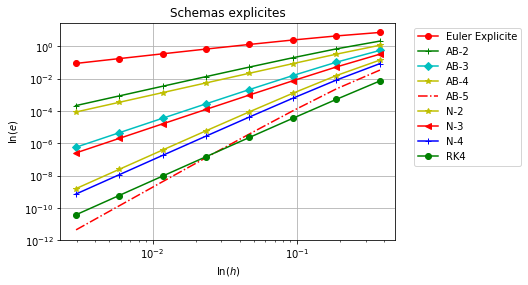

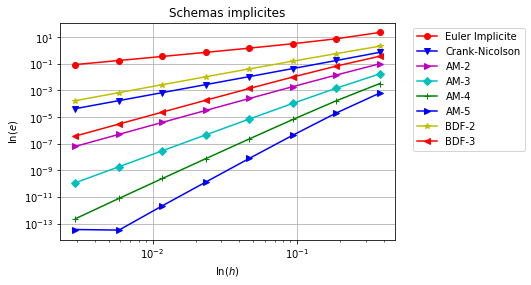

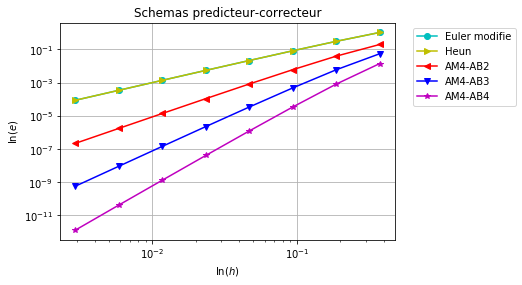

In [47]:
figure(1)
loglog(H,err_ep, 'r-o',label='Euler Explicite')
loglog(H,err_AB2, 'g-+',label='AB-2')
loglog(H,err_AB3, 'c-D',label='AB-3')
loglog(H,err_AB4, 'y-*',label='AB-4')
loglog(H,err_AB5, 'r-.',label='AB-5')
loglog(H,err_N2, 'y-*',label='N-2')
loglog(H,err_N3, 'r-<',label='N-3')
loglog(H,err_N4, 'b-+',label='N-4')
loglog(H,err_RK4, 'g-o',label='RK4')
xlabel('$\ln(h)$')
ylabel('$\ln(e)$')
title("Schemas explicites")
legend(bbox_to_anchor=(1.04,1),loc='upper left')
grid(True)

figure(2)
loglog(H,err_er, 'r-o',label='Euler Implicite')
loglog(H,err_CN, 'b-v',label='Crank-Nicolson')
loglog(H,err_AM2, 'm->',label='AM-2')
loglog(H,err_AM3, 'c-D',label='AM-3')
loglog(H,err_AM4, 'g-+',label='AM-4')
loglog(H,err_AM5, 'b->',label='AM-5')
loglog(H,err_BDF2, 'y-*',label='BDF-2')
loglog(H,err_BDF3, 'r-<',label='BDF-3')
xlabel('$\ln(h)$')
ylabel('$\ln(e)$')
title("Schemas implicites")
legend(bbox_to_anchor=(1.04,1),loc='upper left')
grid(True)

figure(3)
loglog(H,err_em, 'c-o',label='Euler modifie')
loglog(H,err_heun, 'y->',label='Heun')
loglog(H,err_AM4AB2, 'r-<',label='AM4-AB2')
loglog(H,err_AM4AB3, 'b-v',label='AM4-AB3')
loglog(H,err_AM4AB4, 'm-*',label='AM4-AB4')
xlabel('$\ln(h)$')
ylabel('$\ln(e)$')
title("Schemas predicteur-correcteur")
legend(bbox_to_anchor=(1.04,1),loc='upper left')
grid(True)

show()